<a href="https://colab.research.google.com/github/leehyell/AIStudy24/blob/master/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###MBC 마켓
MBC 마켓의 럭키백 성공으로 인해 각각의 지역에서 수산물을 제공하기로 했다.
<br/>
영업팀은 매주 7개의 생선 중 일부를 무작위로 골라 머신러닝 모델을 학습할 수 있도록 훈련 데이터를 제공하고 있다.
<br/>
하지만, 수산물을 제공한다는 곳이 너무 많아서 샘플을 골라내는 일이 힘들어졌다.
<br/>
추가되는 수산물의 샘플도 없다.
<br/>
영업팀은 새로운 생선이 도착하는 대로 가능한 즉시 훈련 데이터를 제공해야 한다.
<br/>


###점진적 학습
당면한 문제는 '훈련 데이터가 한 번에 준비되는 것이 아닌 조금씩 전달되는 것'.
<br/>
* 해결법1<br/>
└ 기존의 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일 훈련.
<br/>
└ 단점: 시간이 지날 수록 데이터가 늘어나면서 인력 추가 or 서버 증설 or 시간적 여유가 줄어듦.
* 해결법2<br/>
└ 새로운 데이터를 추가할 때마다 이전 데이터를 버림. (훈련 데이터 크기를 일정하게 유지하는 방법.)
<br/>
└ 단점: 데이터를 버릴 때 다른 데이터에 없는 중요한 생선 데이터가 포함될 수 있음.
* 해결법3<br/>
└ 점진적 학습(온라인 학습)을 이용해 보는 것.
    * 훈련한 모델을 버리지 않고 조금씩 더 새로운 데이터를 학습.
    * → 확률적 경사 하강법.

###확률적 경사 하강법이란?
* 확률적: 무작위, 랜덤(훈련 세트에서 랜덤하게 하나의 샘플을 고름)
* 경사: 기울기
* 하강: 내려가는
* → 즉, 훈련세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려감.
* 위 방법을 반복수행

<br/><br/>
만약 모든 샘플을 다 사용해도 다 내려오지 못 하는 경우
* 처음부터 다시 시작함.
* 훈련세트에 모든 샘플을 다시 채워 넣음.
* 다시 랜덤하게 하나의 샘플을 선택하여 이어서 경사를 내려감.
* 만족할 만한 위치에 도달할 때까지 계속 내려감.
* 훈련세트를 한 번 모두 사용하는 과정을 에포크(epoch)라고 함.
* 일반적인 경사하강법은 수십, 수백 번 이상 에포크를 수행함.


만약 실제로 등산이라고 가정하고, 산에서 내려온다고 생각했을 때,
<br/>
집으로 돌아가려면 등산로의 입구까지 내려가야 한다.
<br/>
만약 어떤 산길도 척척 내려갈 수 있는 초능력이 있다면, 가장 빠른 길을 선택하는 것이 최선이다.
<br/>
가장 빠른 길은 경사가 가장 가파른 길.
<br/><br/>
실제로 산에서 내려올 때는 천천히 조금씩 내려와야 한다. → 경사하강법.
<br/>
가장 가파른 길을 찾아 내려오지만, 조금씩 내려오는 것이 중요함. → 훈련법.
<br/>
훈련 세트를 사용하여 모델을 훈련하기 때문에 경사 하강법도 당연히 가장 가파른 길을 찾을 것.
<br/>
그런데, 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련세트에서 랜덤하게 골라 가장 가파른 길을 찾는다. → 확률적
<br/><br/>
※ 결론: 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금씩 내려간 다음, 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택해서 경사를 조금 내려감.
<br/>이렇게 전체 샘플을 모두 사용할 때까지 진행.


<br/><br/>
위 방법 대로 샘플 1개를 이용하면 너무 무책임하게 내려갈 수 있다.
<br/>
잘못된 훈련으로 결과가 나오면 돌아갈 수 없다.
<br/>
이러한 문제점을 해소하려고 무작위로 몇 개의 샘플을 선택해 경사를 내려간다면
* 미니 배치 경사 하강법: 여러개의 샘플을 사용해 경사 하강 진행.
* 배치 경사 하강법: 극단적으로 한 번 경사롤을 따라 이동(전체 샘플 사용)
    * 단점: 컴퓨터 자원을 너무 많이 사용한다.
    * 한 번에 전체 데이터를 모두 읽을 수 없을 수 있다.

확률적 경사 하강법은 훈련세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동.
<br/>
이 때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트 되어도 학습을 이어나갈 수 있음.
<br/>
다시 산 꼭대기부터 시작할 필요가 없다. → 신경망 알고리즘(뉴런)을 사용한다.
<br/><br/><br/>
* 손실함수(Loss Function)
    * 머신러닝이 알고리즘이 얼마나 엉터리인지 측정하는 기준.
        * 작을 수록 좋음.
    * 이 값을 찾아서 조금씩 이동
* 비용 함수(Cost Function)
    * 훈련세트에 있는 모든 샘플에 대한 손실함수의 합.
* 에포크(epoch; 시대)
    * 훈련세트를 한 번 모두 사용하는 과정.

In [ ]:
#확률적 경사 하강법
import pandas as pd
#csv파일 읽어오기
fish = pd.read_csv('https://bit.ly/fish_csv_data')
#.head(): 데이터 최상단 5개를 보여줌
fish.head()
#데이터 159개

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
#Species(어종)을 제외한 나머지 특성을 fish_input 변수에 리스트화 하여 넣음.
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
#Species(어종) 특성을 정답 파일로 생성.
fish_target = fish['Species'].to_numpy()
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
#set_printoptions : 소수점 반올림하기
#precision=n : 소수점 n+1 자리를 반올림 후 소수점 n자리까지 나오도록
np.set_printoptions(precision=6, suppress=True)

#사이킷런을 이용하여 훈련용, 테스트용 자료를 나눔.
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
print('train_input')
print(train_input)

train_input
[[ 720.       35.       40.6      16.3618    6.09  ]
 [ 500.       45.       48.        6.96      4.896 ]
 [   7.5      10.5      11.6       1.972     1.16  ]
 [ 110.       22.       23.5       5.5225    3.995 ]
 [ 140.       20.7      23.2       8.5376    3.2944]
 [  69.       18.2      20.3       5.2983    2.8217]
 [ 110.       21.       22.5       5.6925    3.555 ]
 [ 620.       34.5      39.7      15.5227    5.2801]
 [ 130.       21.3      22.8       6.384     3.534 ]
 [  85.       20.       21.        5.082     2.772 ]
 [ 685.       36.5      39.       10.881     6.864 ]
 [ 500.       31.       36.2      14.3714    4.8146]
 [ 514.       32.8      34.       10.03      6.018 ]
 [ 200.       23.       25.8      10.3458    3.6636]
 [1000.       44.       46.6      12.4888    7.5958]
 [ 714.       36.       41.5      16.517     5.8515]
 [   8.7      11.3      12.6       1.9782    1.2852]
 [1000.       43.       45.2      11.9328    7.2772]
 [ 110.       20.8      23.1      

In [ ]:
print(f'훈련용   : {train_input.shape}')
print(f'테스트용 : {test_input.shape}')

훈련용   : (119, 5)
테스트용 : (40, 5)


In [ ]:
print('train_target: ' + train_target)

['train_target: Bream' 'train_target: Pike' 'train_target: Smelt'
 'train_target: Perch' 'train_target: Parkki' 'train_target: Roach'
 'train_target: Perch' 'train_target: Bream' 'train_target: Perch'
 'train_target: Perch' 'train_target: Perch' 'train_target: Bream'
 'train_target: Perch' 'train_target: Parkki' 'train_target: Perch'
 'train_target: Bream' 'train_target: Smelt' 'train_target: Perch'
 'train_target: Roach' 'train_target: Bream' 'train_target: Pike'
 'train_target: Bream' 'train_target: Pike' 'train_target: Perch'
 'train_target: Parkki' 'train_target: Bream' 'train_target: Perch'
 'train_target: Pike' 'train_target: Bream' 'train_target: Perch'
 'train_target: Parkki' 'train_target: Roach' 'train_target: Perch'
 'train_target: Bream' 'train_target: Roach' 'train_target: Perch'
 'train_target: Bream' 'train_target: Bream' 'train_target: Perch'
 'train_target: Perch' 'train_target: Roach' 'train_target: Pike'
 'train_target: Perch' 'train_target: Smelt' 'train_target: Pik

In [ ]:
print(test_target)

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike' 'Bream' 'Whitefish' 'Bream' 'Parkki' 'Bream' 'Bream'
 'Perch' 'Perch' 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Perch' 'Perch' 'Whitefish' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike'
 'Bream' 'Perch' 'Roach' 'Roach' 'Parkki' 'Perch']


In [ ]:
from sklearn.preprocessing import StandardScaler
#표준점수로 처리(전처리)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])
print('-'*53)
print(test_scaled[:5])

[[ 0.919658  0.609432  0.810412  1.851949  1.000757]
 [ 0.300412  1.546534  1.453166 -0.469817  0.272917]
 [-1.085854 -1.68647  -1.708486 -1.701598 -2.004476]
 [-0.797341 -0.608802 -0.674869 -0.824806 -0.276315]
 [-0.712899 -0.730625 -0.700927 -0.08023  -0.703387]]
-----------------------------------------------------
[[-0.887414 -0.918046 -1.030989 -0.904645 -0.807625]
 [-1.069247 -1.50842  -1.543455 -1.588496 -1.938032]
 [-0.544014  0.356414  0.306633 -0.81357  -0.653889]
 [-0.346981 -0.233961 -0.223205 -0.11905  -0.122335]
 [-0.684751 -0.515091 -0.588011 -0.899878 -0.50125 ]]


In [ ]:
#SGDClassifier: 사이킷런의 확률적 경사 하강법 제공, 2개의 매개변수 지정
from sklearn.linear_model import SGDClassifier
#loss='log_loss' : 로지스틱 손실 함수 지정
#max_iter=10     : 10회 에포크 반복(전체 훈련 세트를 10번 반복 실행)
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
# ↑ 훈련용 : 0.773
print(sc.score(test_scaled, test_target))
# ↑ 테스트 : 0.775
#테스트용이 훈련용보다 0.02 높으므로 과소적합
#이는 반복횟수가 너무 적어서 생긴 일로 max_iter를 높이고 훈련하면 됨.

#/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738:
#ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
#warnings.warn(
# → max_iter가 너무 적으니 숫자를 더 올렸으면 좋겠다~~

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
#확률적 경사 하강법은 점진적 학습이 가능하다.
#SGDClassifier 객체를 또 만들지 말고 훈련할 모델을 sc로 추가하여 훈련을 추가한다.

#부분적인(partial) 학습.
sc.partial_fit(train_scaled, train_target)

#↓ 0.7983193277310925
print(sc.score(train_scaled, train_target))
#↓ 0.775
print(sc.score(test_scaled, test_target))

#퍼센트가 증가함. → 무작정 부분적인 학습을 계속하는 것은 의미가 없음. → 기준점 제공이 필요함.(어느 시점에 데이터를 넣을 것이냐)
#현재는 등산 내려오다가 정지된 느낌.

0.7983193277310925
0.775


###에포크와 과대/과소 적합
* 에포크 횟수가 적으면 훈련 세트를 덜 학습한다.
    * 119개에서 10번만 랜덤 추출 후 정지
* 에포크 횟수가 충분히 많으면 훈련 세트를 완전히 학습할 것.
    * very good~

<br/><br/>
확률적 경사 하강법을 사용한 모델은 **에포크 횟수**에 따라 과소, 과대 적합이 될 수 있다.
* 적은 에포크 횟수 동안 훈련된 모델은 훈련 세트와 테스트 세트에 맞지 않는다.
    * └ 과소 적합
* 반대로 에포크 횟수가 많은 훈련 모델인 경우 너무 잘 맞아 테스트 세트는 오히려 점수가 안 좋다.
    * └ 과대 적합
<br/><br/>
과대 적합이 되기 전에 훈련을 멈추는 것: **조기 종료**

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)

#훈련 세트 점수 배열화
train_score = []
#테스트 세트 점수 배열화
test_score = []

#train_target에 있는 7개의 생선 특성을 클래스로 제공
classes = np.unique(train_target)

#파이썬의 _ 변수: 임시 변수; 1회용
#300번의 에포크 동안 훈련을 진행해라.
for _ in range(0, 300):
    #훈련을 부분적으로 추가하는 partial_fit
    sc.partial_fit(train_scaled, train_target, classes=classes)
    #반복마다 훈련 세트와 테스트 세트의 점수를 계산 후 train_score, test_score 리스트에 추가
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

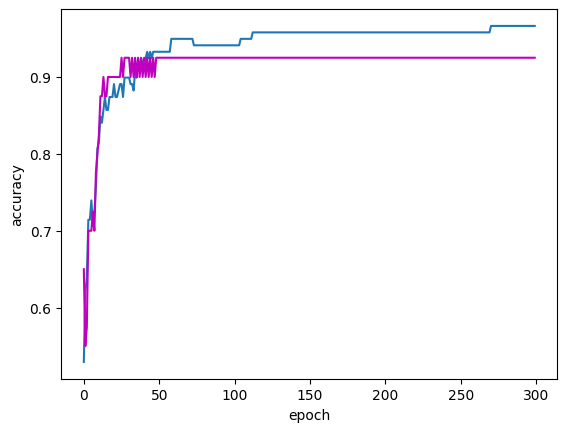

In [ ]:
import matplotlib.pyplot as plt

#훈련 세트 점수; 파란색
plt.plot(train_score)
#테스트 세트 점수; 보라색
plt.plot(test_score, color='m')
#에포크 횟수
plt.xlabel('epoch')
#정확도
plt.ylabel('accuracy')
plt.show()

In [ ]:
#결론: 에포크 횟수를 100번 정도로 돌리니 차트 상으로 과대, 과소 적합이 아닌 최상으로 나옴.

#확률적 경사 하강법은 일정 에포크 동안 성능이 향상되지 않으면, 더이상 훈련하지 않고 자동으로 멈춤.
#tol=None: 조기 종료 없음.
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

#↓ 0.957983193277311
print(sc.score(train_scaled, train_target))
#↓ 0.925
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
sc.predict(test_scaled[:5])

proba = sc.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.003, 0.774, 0.   , 0.219, 0.   , 0.005],
       [0.   , 0.001, 0.015, 0.   , 0.04 , 0.945, 0.   ],
       [0.   , 0.   , 0.011, 0.96 , 0.02 , 0.008, 0.001],
       [0.   , 0.   , 0.525, 0.   , 0.423, 0.   , 0.052],
       [0.   , 0.   , 0.688, 0.   , 0.306, 0.   , 0.006]])

In [ ]:
sc.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='<U9')

###손실 함수란?
* loss 매개값의 기본 값은 loss=hinge.(힌지 손실)
    * 서포트 백터 머신이라고 불림.
* 또 다른 머신러닝 알고리즘을 위한 손실 함수.
* 이미지에 많이 쓰임.
* https://velog.io/@lee9843/Word2Vec%EC%9D%84-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-%EC%9C%84%ED%95%9C-%EB%82%B4%EC%9A%A94-hinge-loss-%ED%9E%8C%EC%A7%80-%EC%86%90%EC%8B%A4

In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
